In [1]:
using PotentialFlow

# Install libraries if necessary
using Pkg
for pkg in ["Interact", "Plots"]
    try
        Pkg.installed(pkg)
    catch
        Pkg.add(pkg)
    end
end
using Interact
using Plots

clibrary(:colorbrewer);
streamline_colors = cgrad([:black, :black]);
default(ratio = 1, legend = false);

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/85b273f43c773111046af39cf53d78ed791f1db2-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/85b273f43c773111046af39cf53d78ed791f1db2-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


# The Doublet

Given a freestream in the $x$-direction, we want to place potential flow elements to form a cylinder centered at the origin.

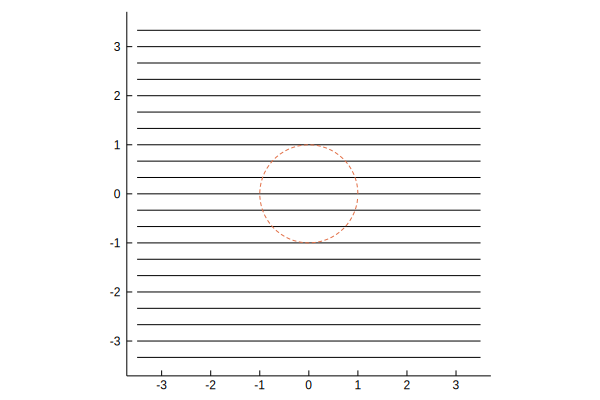

In [2]:
freestream = Freestream(1.0);
ψ_levels = collect(range(-5, 5, length=31))
X = Y = range(-3.5, 3.5, length=100)
streamlines(X, Y, freestream, levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's try to place a point vortex at the origin to redirect flow over/under the cylinder.

In [3]:
@manipulate for dir in [:cw, :ccw]
    point = Vortex.Point(0.0, dir == :cw ? -2π : 2π)
    plt = streamlines(X, Y, ([point], freestream), levels = ψ_levels, color = streamline_colors)
    plot!(plt, cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
    plt
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:dir=>Widget{:togglebuttons,Any}(OrderedDict{Symbol,Any}(:options=>Observable{Array{Symbol,1}} with 2 listeners. Value:
Symbol[:cw, :ccw],:index=>Observable{Any} with 2 listeners. Value:
1,:vals2idxs=>Observable{Any} with 1 listeners. Value:
Symbol[:cw, :ccw]), Observable{Any} with 2 listeners. Value:
:cw, Scope("knockout-component-073ec48f-c16f-4be4-9237-9a0fec3345f5", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["dir"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :button), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")), 0)], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function () {\$root.index(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'button is-fullwidth' : true}")), 1)], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"field is-grouped has-addons is-oneline is-centered"), 2)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 3), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 9), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"cw","val"=>1,"id"=>"idqfXMyd7Q"), OrderedDict{String,Any}("key"=>"ccw","val"=>2,"id"=>"idA52ZdNx4")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/darwin/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"options_js\\\":[{\\\"key\\\":\\\"cw\\\",\\\"val\\\":1,\\\"id\\\":\\\"idqfXMyd7Q\\\"},{\\\"key\\\":\\\"ccw\\\",\\\"val\\\":2,\\\"id\\\":\\\"idA52ZdNx4\\\"}],\\\"index\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"options_js\"].subscribe((function (val){!(this.valueFromJulia[\"options_js\"]) ? (WebIO.setval({\"name\":\"options_js\",\"scope\":\"knockout

So we want a CW vortex above the origin and a CCW vortex below the origin:

In [4]:
@manipulate for Δy in range(0, 1, length=10)
point = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π])
streamlines(X, Y, (point, freestream), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:Δy=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
5,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.111111", "0.222222", "0.333333", "0.444444", "0.555556", "0.666667", "0.777778", "0.888889", "1.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.444444",:value=>Observable{Float64} with 2 listeners. Value:
0.444444), Observable{Float64} with 2 listeners. Value:
0.444444, Scope("knockout-component-a26c7162-81f0-41a2-9144-0ffc2b775272", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["Δy"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.111111", "0.222222", "0.333333", "0.444444", "0.555556", "0.666667", "0.777778", "0.888889", "1.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.444444", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/darwin/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.111111\\\",\\\"0.222222\\\",\\\"0.333333\\\",\\\"0.444444\\\",\\\"0.555556\\\",\\\"0.666667\\\",\\\"0.777778\\\

We see that as we move the vortices closer, the closed streamline becomese more circular.
However, its radius becomes smaller.

In [5]:
@manipulate for Δy = slider(range(0, 2, length=10), value = 1.0)
points = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π]./Δy)
streamlines(X, Y, (points, freestream), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:Δy=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
6,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.222222", "0.444444", "0.666667", "0.888889", "1.11111", "1.33333", "1.55556", "1.77778", "2.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"1.11111",:value=>Observable{Float64} with 2 listeners. Value:
1.0), Observable{Float64} with 2 listeners. Value:
1.0, Scope("knockout-component-d0d5d8bc-672e-43b2-b4b8-8e893f227b6a", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.222222", "0.444444", "0.666667", "0.888889", "1.11111", "1.33333", "1.55556", "1.77778", "2.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"1.11111", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/darwin/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.222222\\\",\\\"0.444444\\\",\\\"0.666667\\\",\\\"0.888889\\\",\\\"1.11111\\\",\\\"1.33333\\\",\\\"1.55556\\\",\\\"1.77778\\\",\\

We can scale their circulations to be inversely proportional to their distance.
Taking the limit as their distance go to zero, we get a **doublet**.

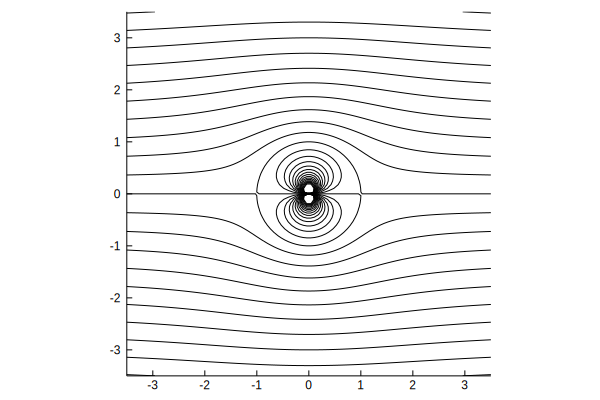

In [6]:
doublet = PotentialFlow.Doublets.Doublet(0.0im, π)
streamlines(X, Y, [freestream, doublet], levels = ψ_levels, color = streamline_colors)

# Method of Images

In the previous discussion, we talked about how we can create flow obstacles using source/vortex sheets.
Another way to deal with solid surfaces in potential flow is to take advantage of certain flow symmetries.

Two point vortices with opposite signed circulation placed across the $x$-axis will eliminate the vertical velocities along the $x$-axis

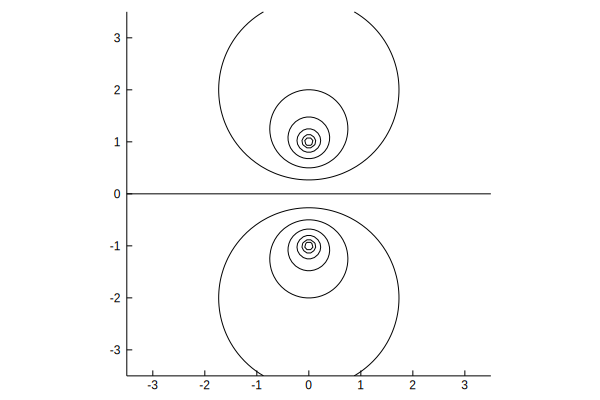

In [7]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

## How would we set up a system of images to find the streamlines of a point vortex near a corner?

In [8]:
Γ₁ = 1.0
zs = [1 + im, -1 + im, -1 - im, 1 - im]
@manipulate for Γ₂ in range(-Γ₁, Γ₁, length = 51),
                Γ₃ in range(-Γ₁, Γ₁, length = 51),
                Γ₄ in range(-Γ₁, Γ₁, length = 51)
    points = Vortex.Point.(zs, [Γ₁, Γ₂, Γ₃, Γ₄])
    streamlines(X, Y, points, color = streamline_colors)
    plot!(points, markersize = 10, color = :RdBu)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:Γ₂=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
26,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["-1.0", "-0.96", "-0.92", "-0.88", "-0.84", "-0.8", "-0.76", "-0.72", "-0.68", "-0.64"  …  "0.64", "0.68", "0.72", "0.76", "0.8", "0.84", "0.88", "0.92", "0.96", "1.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.0",:value=>Observable{Float64} with 2 listeners. Value:
0.0), Observable{Float64} with 2 listeners. Value:
0.0, Scope("knockout-component-950a701b-f107-4ddb-959d-6483115a6028", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["Γ₂"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>51,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["-1.0", "-0.96", "-0.92", "-0.88", "-0.84", "-0.8", "-0.76", "-0.72", "-0.68", "-0.64"  …  "0.64", "0.68", "0.72", "0.76", "0.8", "0.84", "0.88", "0.92", "0.96", "1.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
26, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/darwin/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"-1.0\\\",\\\"-0.96\\\",\\

Let's go back to the simple 2 point vortex case:

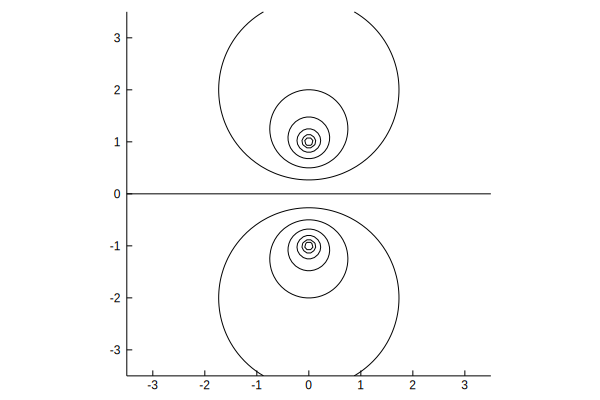

In [9]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

Now let's move these pair of vortices so that we shift and rotate our wall

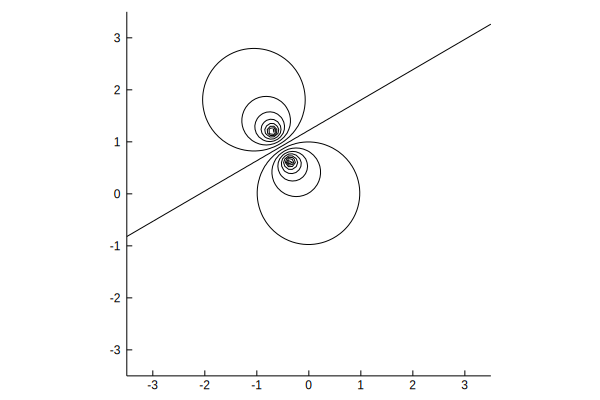

In [10]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)

Notice how the contours form closed circles:

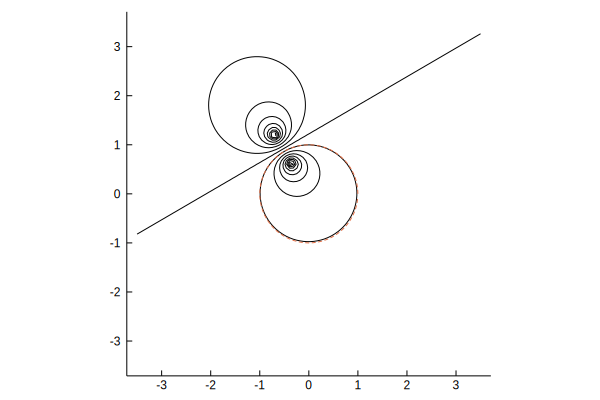

In [11]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Since these streamlines are just contours showing curves with equal streamfunction values, the marked cylinder can be preserved if we superimpose another potential flow field that also has the cylinder as a closed streamline.

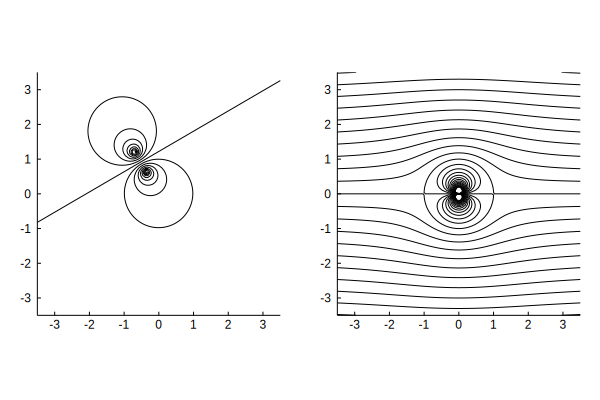

In [12]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
images = streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)
cylinder = streamlines(X, Y, [freestream, doublet], levels = ψ_levels, color = streamline_colors)
plot(images, cylinder, layout = (1, 2))

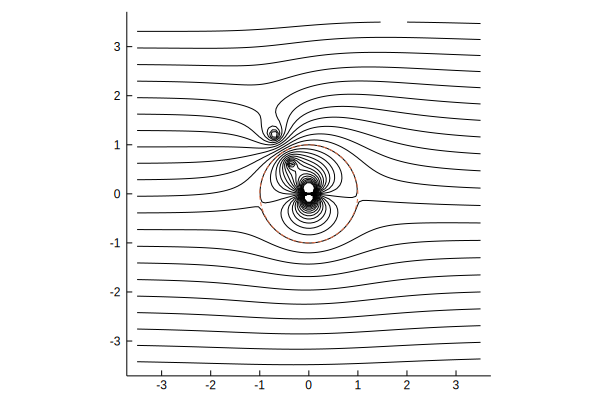

In [13]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), 
    levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's consider another approach to the same result.
Imagine if we had a perfectly good cylinder flow.
Then we deicde to put a vortex somewhere outside.

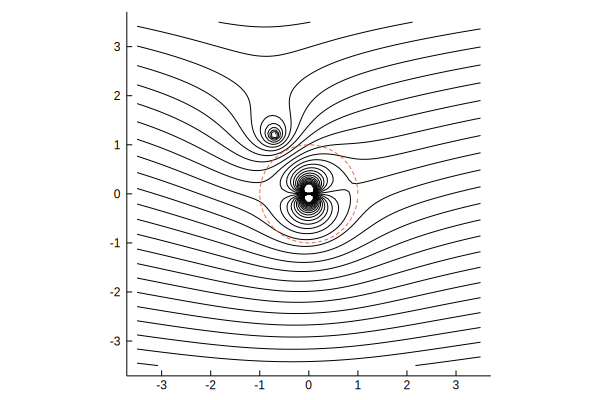

In [14]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

We now want to place an image vortex that would reform the wall of the cylinder:

In [15]:
@manipulate for x in range(-2, 2, length=21)
point = Vortex.Point(x + 1.2im, 10)
image = Vortex.Point(conj(1/point.z), -10)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
11,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["-2.0", "-1.8", "-1.6", "-1.4", "-1.2", "-1.0", "-0.8", "-0.6", "-0.4", "-0.2"  …  "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4", "1.6", "1.8", "2.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.0",:value=>Observable{Float64} with 2 listeners. Value:
0.0), Observable{Float64} with 2 listeners. Value:
0.0, Scope("knockout-component-94f44f5e-5389-4949-8c5e-35db749884e8", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["-2.0", "-1.8", "-1.6", "-1.4", "-1.2", "-1.0", "-0.8", "-0.6", "-0.4", "-0.2"  …  "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4", "1.6", "1.8", "2.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
11, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/darwin/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/home/darwin/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/home/darwin/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"-2.0\\\",\\\"-1.8\\\",\\\"-1.6\\\",\\\"-1.4\\\",\\\"-1.2\\\